In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel("Produksi Tanaman Perkebunan Sumatera Selatan 2022.xlsx")

In [ ]:
df

,Kota/Kabupaten,Karet (Ton),Kelapa (Ton),Kelapa Sawit (Ton),Kopi (Ton),Kakao (Ton),Lainnya (Ton)
0,Ogan Komering Ulu,76577,239,113749,16317,37,0
1,Ogan Komering Ilir,190872,1531,370215,335,93,110590
2,Muara Enim,173228,1190,222405,27652,125,0
3,Lahat,26195,325,164614,22010,2494,17
4,Musi Rawas,127864,1775,427076,3196,162,1379
5,Musi Banyuasin,213466,3276,1044703,0,3,0
6,Banyuasin,103894,46600,569345,724,37,0
7,Ogan Komering Ulu Selatan,3444,418,192,62399,474,5
8,Ogan Komering Ulu Timur,38500,1604,57726,2200,415,77
9,Ogan Ilir,33520,180,29884,0,0,21


In [ ]:
df.head()

,Kota/Kabupaten,Karet (Ton),Kelapa (Ton),Kelapa Sawit (Ton),Kopi (Ton),Kakao (Ton),Lainnya (Ton)
0,Ogan Komering Ulu,76577,239,113749,16317,37,0
1,Ogan Komering Ilir,190872,1531,370215,335,93,110590
2,Muara Enim,173228,1190,222405,27652,125,0
3,Lahat,26195,325,164614,22010,2494,17
4,Musi Rawas,127864,1775,427076,3196,162,1379


In [ ]:
df.shape

(17, 8)

In [ ]:
#cek missing value
df.isnull().sum()

Kota/Kabupaten        0
Karet (Ton)           0
Kelapa (Ton)          0
Kelapa Sawit (Ton)    0
Kopi (Ton)            0
Kakao (Ton)           0
Lainnya (Ton)         0
dtype: int64

In [ ]:
# Mengambil variabel-variabel yang digunakan dalam melakukan clustering
features = ["Karet (Ton)", "Kelapa (Ton)",
           "Kelapa Sawit (Ton)", "Kopi (Ton)", "Kakao (Ton)", "Lainnya (Ton)"]

In [ ]:
# Membuat dataframe dari variabel-variabel yang akan digunakan dalam melakukan clustering
df_clustering = df[features]


In [ ]:
df_clustering.head()

,Karet (Ton),Kelapa (Ton),Kelapa Sawit (Ton),Kopi (Ton),Kakao (Ton),Lainnya (Ton)
0,76577,239,113749,16317,37,0
1,190872,1531,370215,335,93,110590
2,173228,1190,222405,27652,125,0
3,26195,325,164614,22010,2494,17
4,127864,1775,427076,3196,162,1379


#EDA

### Box Plot

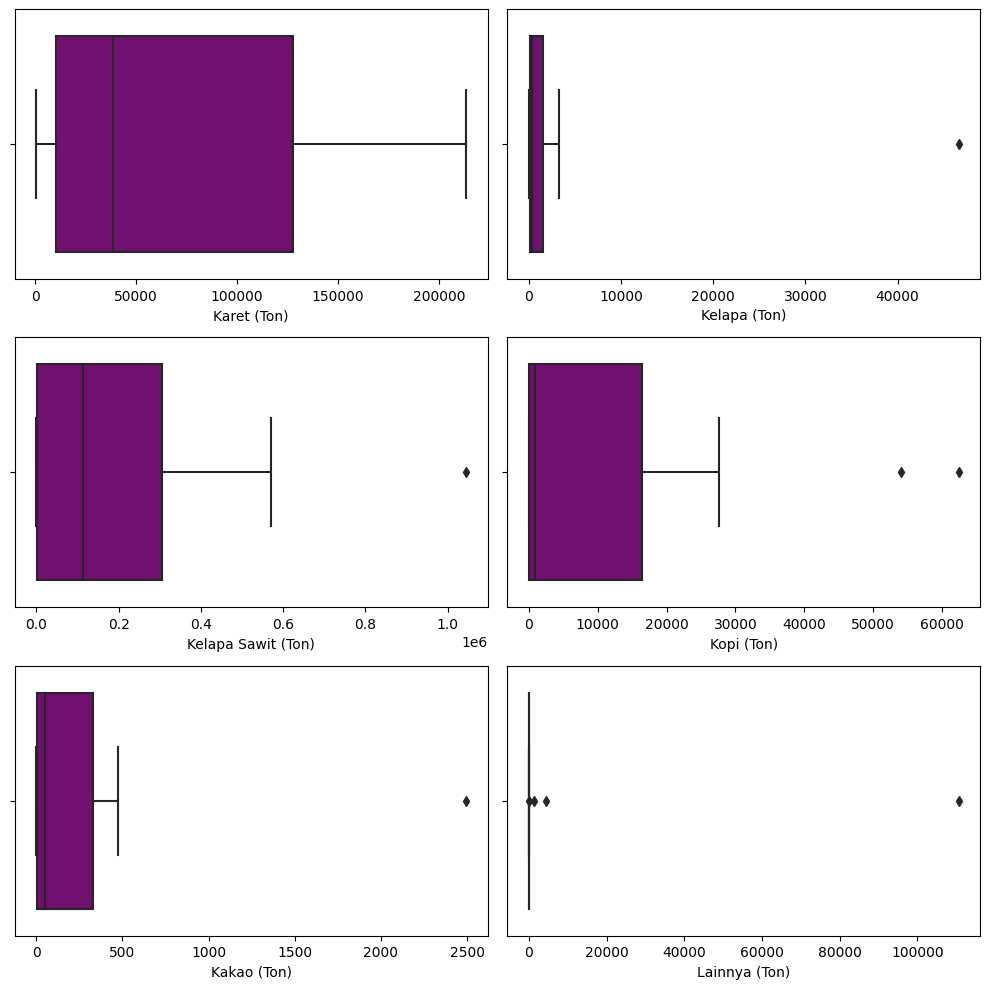

In [ ]:

# Membuat boxplot untuk variabel-variabel seluruh variabel karena seluruhnya merupakan data numerik
plt.figure(figsize=(10, 10))
for i in range(0, len(features)):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[features[i]], color='purple')
    plt.tight_layout()

plt.show()

### Distribution Plot

<ipython-input-10-73639b307631>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clustering[features[i]], color='blue')
<ipython-input-10-73639b307631>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_clustering[features[i]], color='blue')
<ipython-input-10-73639b307631>:5: UserWarning: 



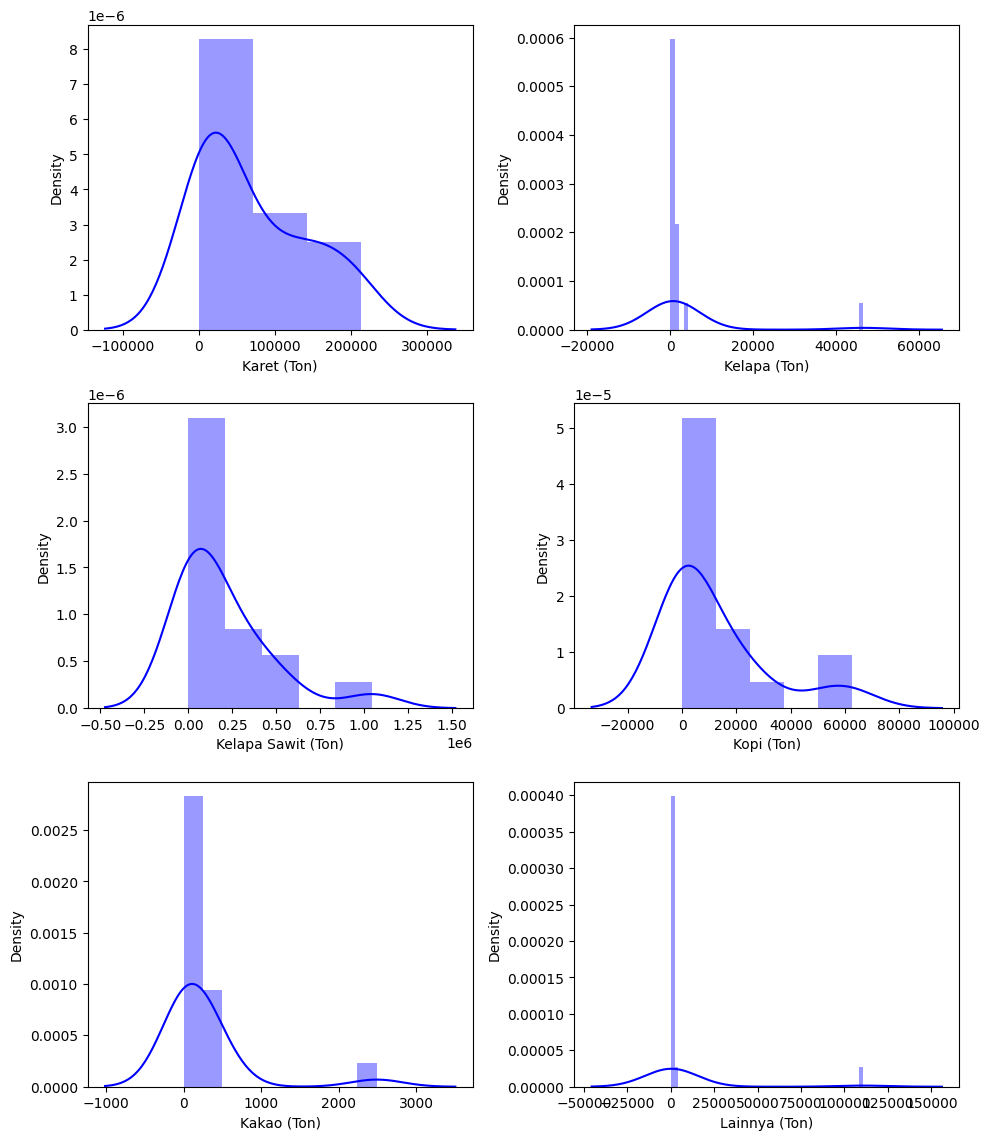

In [ ]:
# Membuat distribution plot untuk setiap variabel
plt.figure(figsize=(10, 30))
for i in range(0, len(features)):
    plt.subplot(8, 2,i+1)
    sns.distplot(df_clustering[features[i]], color='blue')
    plt.tight_layout()

### Visualisasi Karet

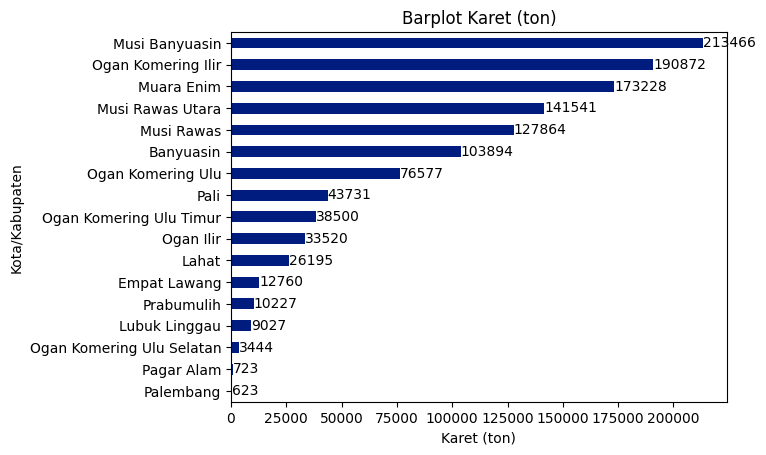

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

colors = sns.color_palette('dark')

# Mencari nilai tertinggi berdasarkan rating
karetdata = df[['Karet (Ton)', 'Kota/Kabupaten']]
dfsortedku = karetdata.sort_values(by=['Karet (Ton)'])
data = dfsortedku

# Menampilkan barplot
barplot = data.plot(kind='barh', x='Kota/Kabupaten', legend=False, color=colors)
for label in barplot.containers:
    barplot.bar_label(label)

# Menambahkan label pada sumbu x dan y
plt.ylabel('Kota/Kabupaten')
plt.xlabel('Karet (ton)')

# Menambahkan judul plot
plt.title('Barplot Karet (ton)')

# Menampilkan plot
plt.show()

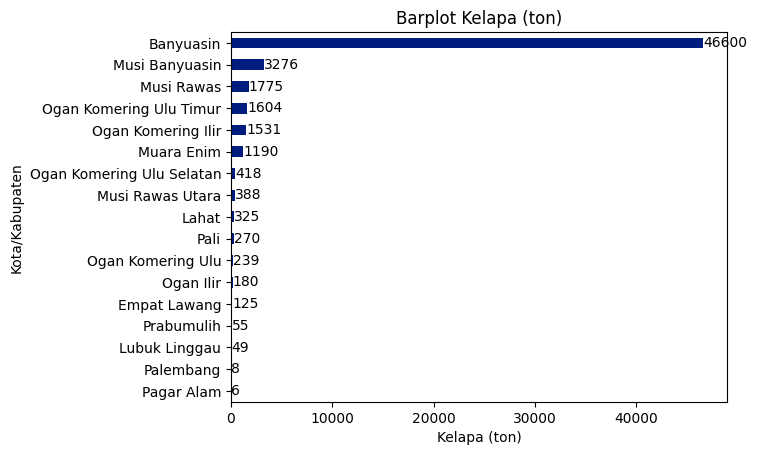

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

colors = sns.color_palette('dark')

# Mencari nilai tertinggi berdasarkan rating
karetdata = df[['Kelapa (Ton)', 'Kota/Kabupaten']]
dfsortedku = karetdata.sort_values(by=['Kelapa (Ton)'])
data = dfsortedku

# Menampilkan barplot
barplot = data.plot(kind='barh', x='Kota/Kabupaten', legend=False, color=colors)
for label in barplot.containers:
    barplot.bar_label(label)

# Menambahkan label pada sumbu x dan y
plt.ylabel('Kota/Kabupaten')
plt.xlabel('Kelapa (ton)')

# Menambahkan judul plot
plt.title('Barplot Kelapa (ton)')

# Menampilkan plot
plt.show()

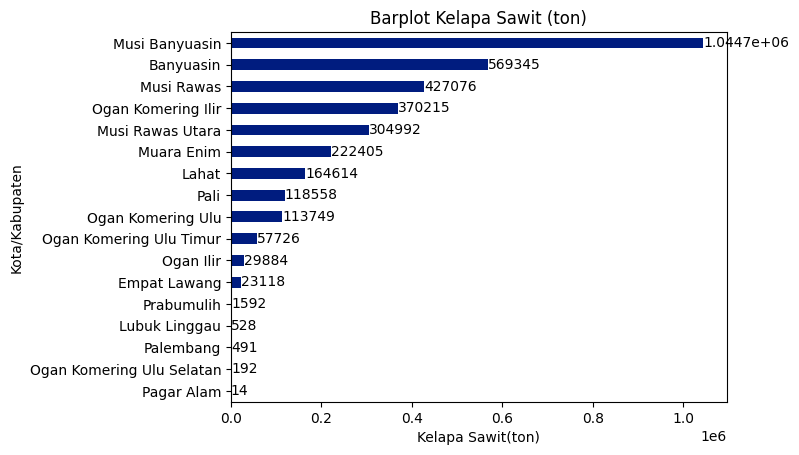

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

colors = sns.color_palette('dark')

# Mencari nilai tertinggi berdasarkan rating
karetdata = df[['Kelapa Sawit (Ton)', 'Kota/Kabupaten']]
dfsortedku = karetdata.sort_values(by=['Kelapa Sawit (Ton)'])
data = dfsortedku

# Menampilkan barplot
barplot = data.plot(kind='barh', x='Kota/Kabupaten', legend=False, color=colors)
for label in barplot.containers:
    barplot.bar_label(label)

# Menambahkan label pada sumbu x dan y
plt.ylabel('Kota/Kabupaten')
plt.xlabel('Kelapa Sawit(ton)')

# Menambahkan judul plot
plt.title('Barplot Kelapa Sawit (ton)')

# Menampilkan plot
plt.show()

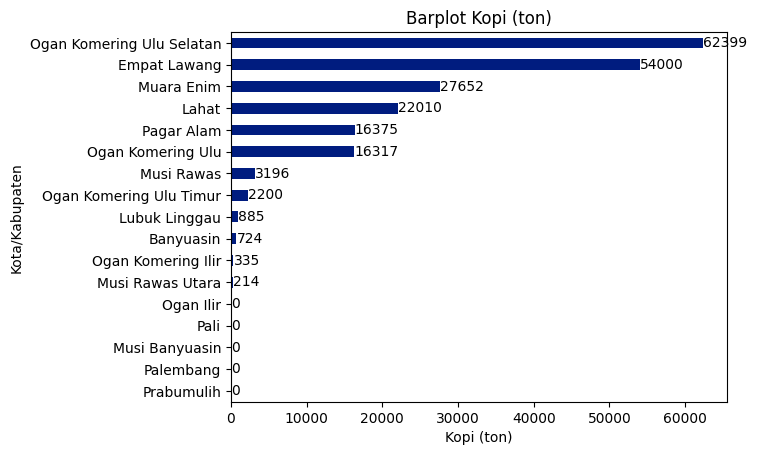

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

colors = sns.color_palette('dark')

# Mencari nilai tertinggi berdasarkan rating
karetdata = df[['Kopi (Ton)', 'Kota/Kabupaten']]
dfsortedku = karetdata.sort_values(by=['Kopi (Ton)'])
data = dfsortedku

# Menampilkan barplot
barplot = data.plot(kind='barh', x='Kota/Kabupaten', legend=False, color=colors)
for label in barplot.containers:
    barplot.bar_label(label)

# Menambahkan label pada sumbu x dan y
plt.ylabel('Kota/Kabupaten')
plt.xlabel('Kopi (ton)')

# Menambahkan judul plot
plt.title('Barplot Kopi (ton)')

# Menampilkan plot
plt.show()

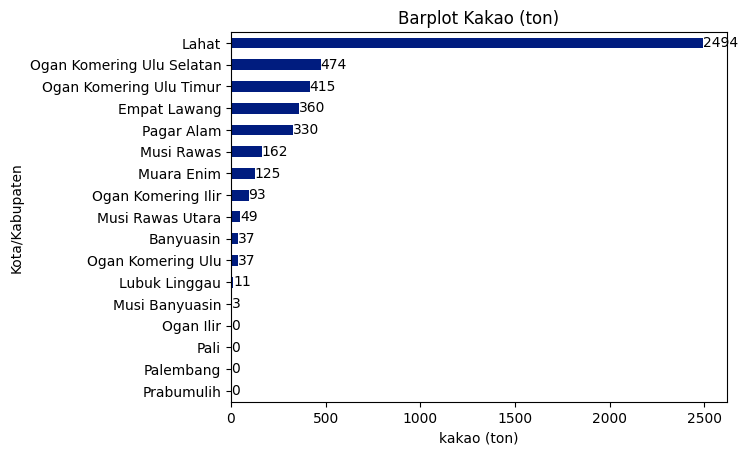

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

colors = sns.color_palette('dark')

# Mencari nilai tertinggi berdasarkan rating
karetdata = df[['Kakao (Ton)', 'Kota/Kabupaten']]
dfsortedku = karetdata.sort_values(by=['Kakao (Ton)'])
data = dfsortedku

# Menampilkan barplot
barplot = data.plot(kind='barh', x='Kota/Kabupaten', legend=False, color=colors)
for label in barplot.containers:
    barplot.bar_label(label)

# Menambahkan label pada sumbu x dan y
plt.ylabel('Kota/Kabupaten')
plt.xlabel('kakao (ton)')

# Menambahkan judul plot
plt.title('Barplot Kakao (ton)')

# Menampilkan plot
plt.show()

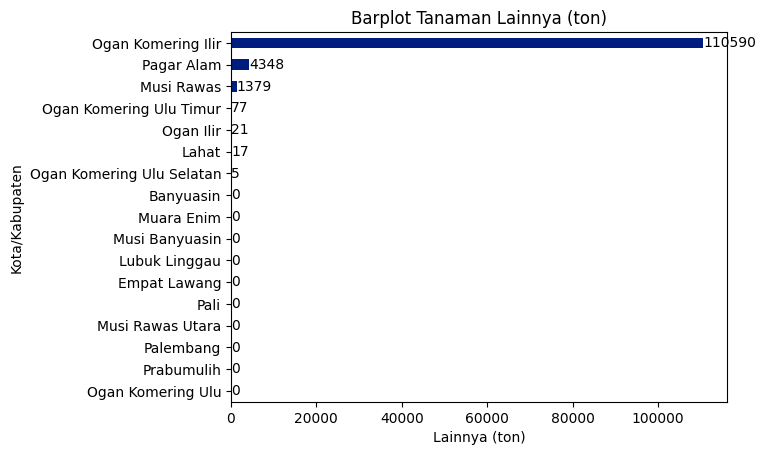

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

colors = sns.color_palette('dark')

# Mencari nilai tertinggi berdasarkan rating
karetdata = df[['Lainnya (Ton)', 'Kota/Kabupaten']]
dfsortedku = karetdata.sort_values(by=['Lainnya (Ton)'])
data = dfsortedku

# Menampilkan barplot
barplot = data.plot(kind='barh', x='Kota/Kabupaten', legend=False, color=colors)
for label in barplot.containers:
    barplot.bar_label(label)

# Menambahkan label pada sumbu x dan y
plt.ylabel('Kota/Kabupaten')
plt.xlabel('Lainnya (ton)')

# Menambahkan judul plot
plt.title('Barplot Tanaman Lainnya (ton)')

# Menampilkan plot
plt.show()

### Pair Plot

<Figure size 1500x1500 with 0 Axes>

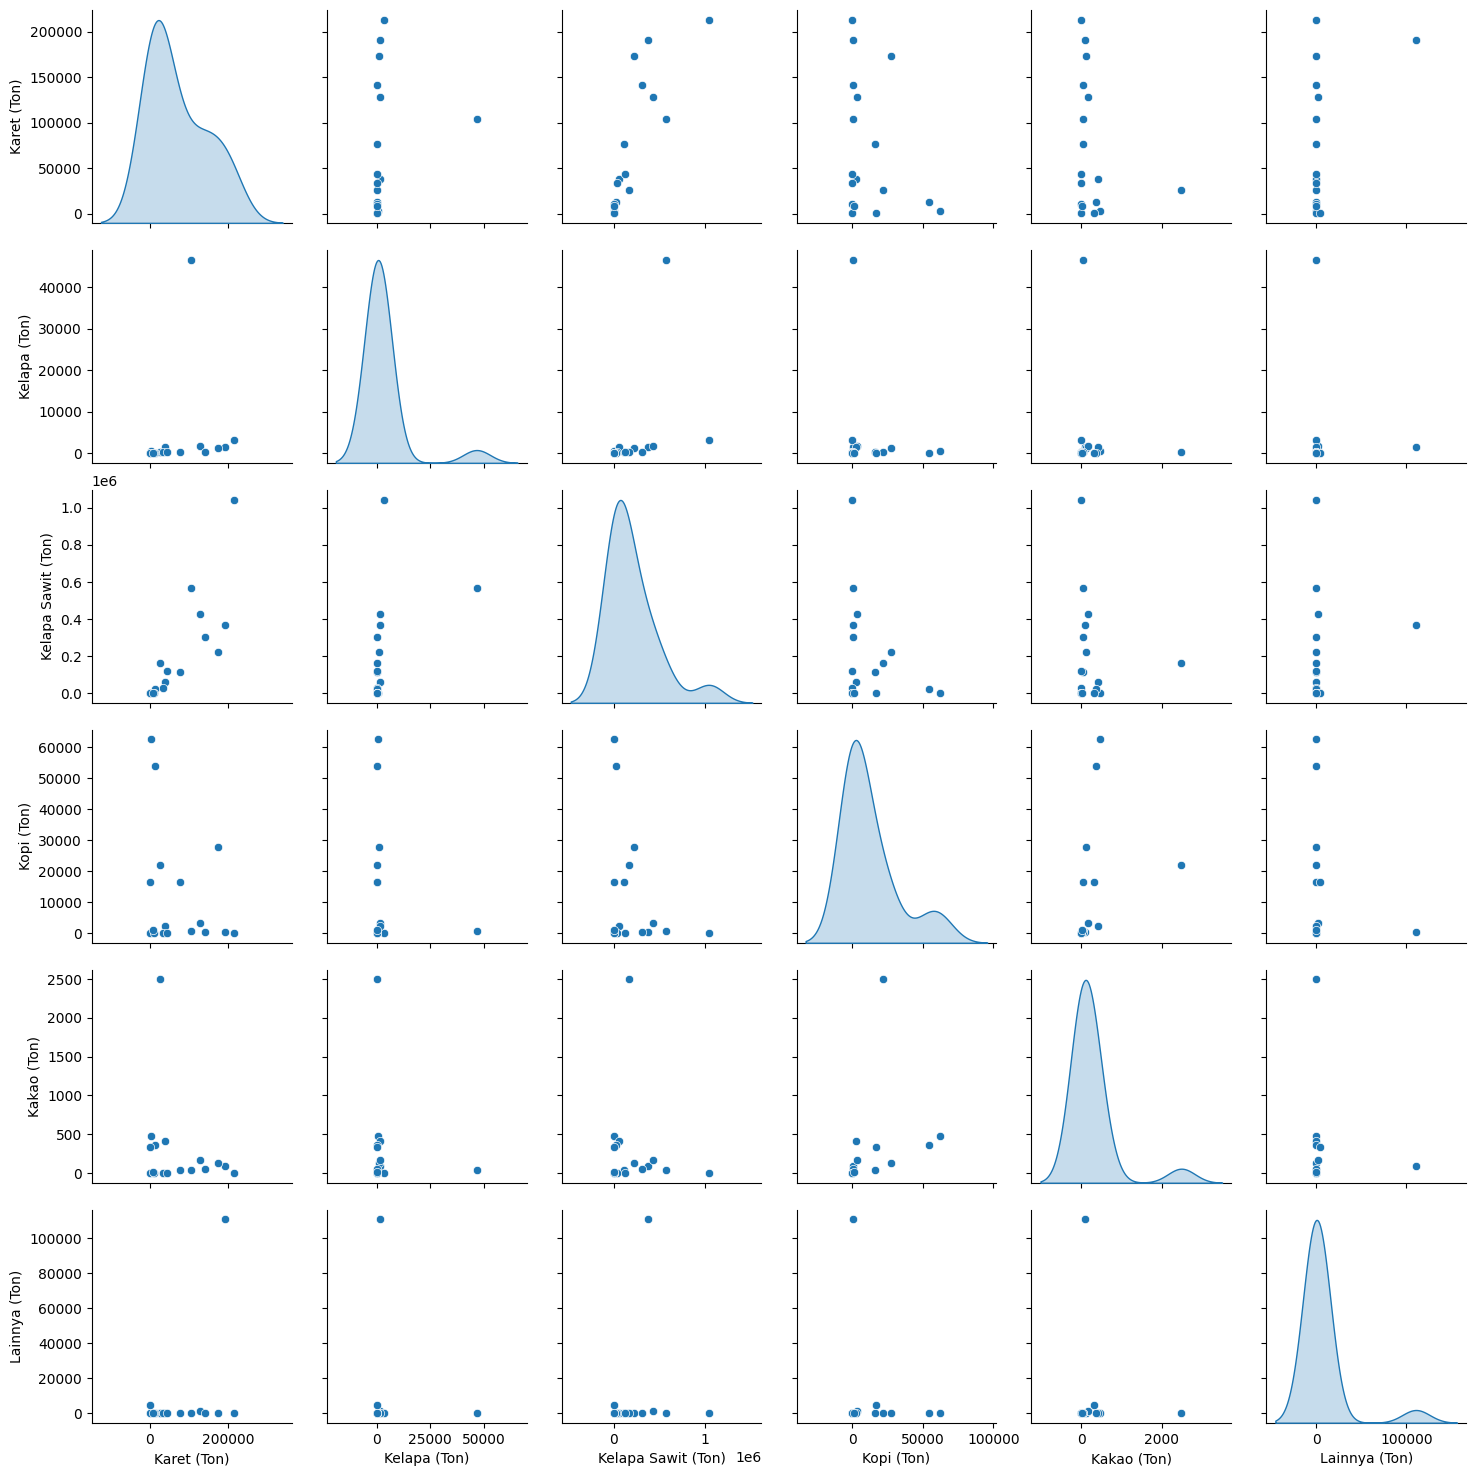

In [ ]:
# Membuat pair plot untuk seluruh variabel
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde')
plt.show()

In [ ]:
# Karena tidak terdapat missing value cukup normalisasi data
# Melakukan normalisasi dengan min max scaler
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(df_clustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

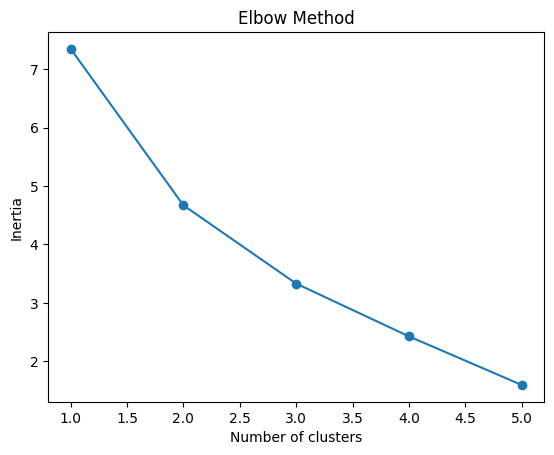

In [ ]:
# Menentukan cluster optimal dengan metode elbow dengan rentang cluster 1-6
inertia = []
for k in range(1, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 6), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [ ]:
k = 3  # klaster  optimal menurut saya
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(normalized_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [ ]:
df['Cluster'] = kmeans.labels_

In [ ]:
print(df[['Kota/Kabupaten', 'Cluster']])

               Kota/Kabupaten  Cluster
0           Ogan Komering Ulu        1
1          Ogan Komering Ilir        2
2                  Muara Enim        2
3                       Lahat        0
4                  Musi Rawas        2
5              Musi Banyuasin        2
6                   Banyuasin        2
7   Ogan Komering Ulu Selatan        0
8     Ogan Komering Ulu Timur        1
9                   Ogan Ilir        1
10               Empat Lawang        0
11                       Pali        1
12           Musi Rawas Utara        2
13                  Palembang        1
14                 Prabumulih        1
15                 Pagar Alam        1
16              Lubuk Linggau        1


Klaster 0: Klaster ini mencakup Kota/Kabupaten seperti Lahat, Ogan Komering Ulu Selatan, dan Empat Lawang. Dalam contoh ini, klaster ini memiliki karakteristik dengan nilai yang relatif lebih rendah pada fitur-fitur tertentu. Berdasarkan karakteristik ini, klaster ini mungkin cocok untuk tanaman dengan kebutuhan yang lebih rendah dalam hal produksi atau faktor-faktor pertumbuhan tertentu.

Klaster 1: Klaster ini mencakup banyak Kota/Kabupaten seperti Ogan Komering Ulu, Ogan Komering Ulu Timur, Ogan Ilir, Palembang, Prabumulih, Pagar Alam, dan Lubuk Linggau. Dalam contoh ini, klaster ini memiliki karakteristik dengan nilai yang lebih tinggi pada beberapa fitur seperti Kopi dan Kakao. Berdasarkan karakteristik ini, klaster ini mungkin cocok untuk tanaman seperti kopi dan kakao.

Klaster 2: Klaster ini mencakup Kota/Kabupaten seperti Ogan Komering Ilir, Muara Enim, Musi Rawas, Musi Banyuasin, Banyuasin, dan Musi Rawas Utara. Dalam contoh ini, klaster ini memiliki karakteristik dengan nilai yang lebih tinggi pada beberapa fitur seperti Kelapa Sawit. Berdasarkan karakteristik ini, klaster ini mungkin cocok untuk tanaman seperti kelapa sawit.

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(normalized_features)
pcs = pca.transform(normalized_features)

df_pca = pd.DataFrame(data = pcs, columns = ['PCA 1', 'PCA 2'])
df_pca.head()

,PCA 1,PCA 2
0,-0.060001,0.008451
1,0.757184,0.193025
2,0.232200,0.358111
3,-0.417367,0.354694
4,0.338684,0.008523


In [ ]:
df_pca['clusters'] = kmeans.labels_
df_pca.head(2)

,PCA 1,PCA 2,clusters
0,-0.060001,0.008451,1
1,0.757184,0.193025,2


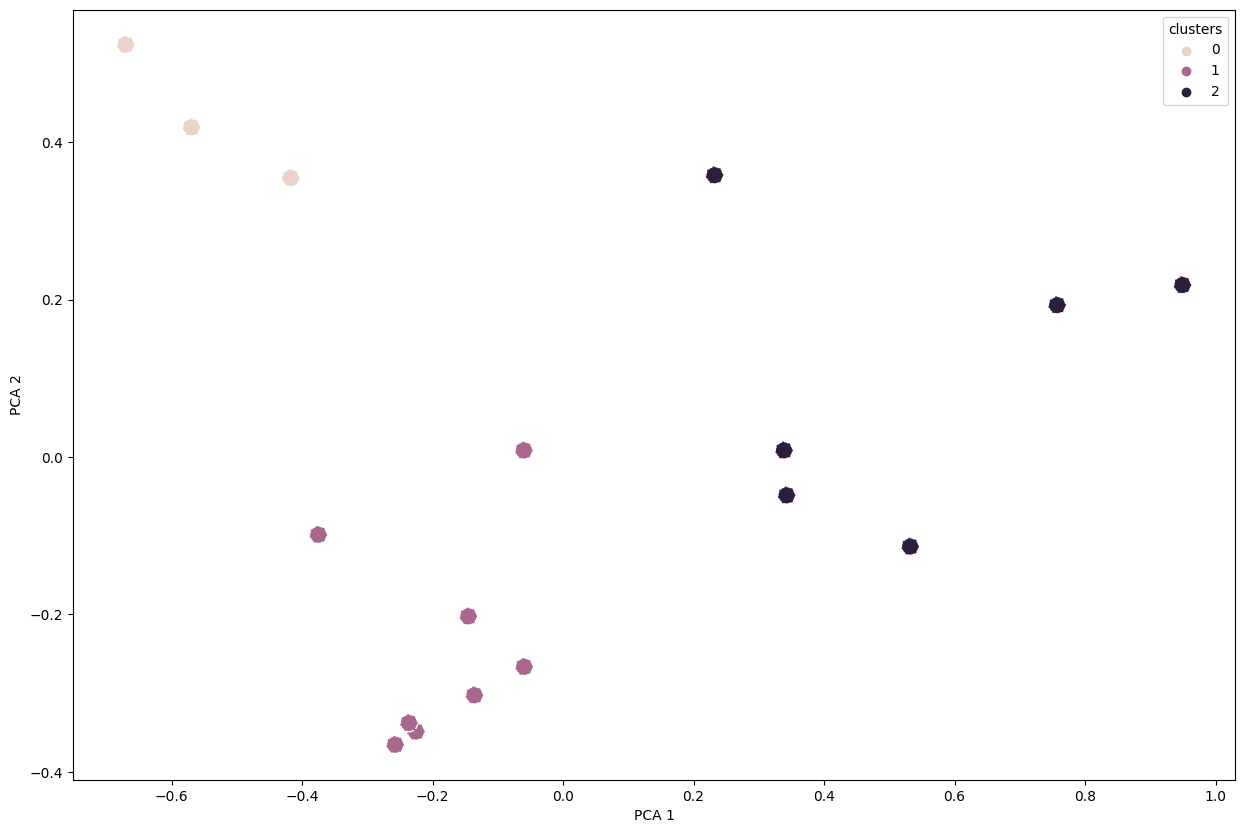

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x='PCA 1', y='PCA 2',
    hue='clusters',
    linestyle='--',
    data=df_pca,
    s=160,
    ax=ax
)

plt.show()

In [ ]:
df['Cluster'] .value_counts()

1    8
2    6
0    3
Name: Cluster, dtype: int64